# EDA Notebook
## Author: Jarrod Sims

## Import Libraries

In [202]:
# Import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [253]:
# Load csv into a DataFrame

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Describe Data

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Transform Categorical Values
The following key outlines how the categorical variables can be encoded as integer values:
- Attrition: 'Yes': 1, 'No': 0
- BusinessTravel: 'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2
- Department: 'Sales': 1, 'Research & Development': 2, 'Human Resources':3
- EducationField: 1 for 'Life Sciences': 1, 'Medical': 2, 'Marketing':3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6
- Gender: 1 for 'Male': 1, 'Female': 2
- JobRole: 'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician':3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Research Director': 6, 'Human Resources':7, 'Manager':8, 'Sales Representative':9
- MaritalStatus: 'Single': 1, 'Married': 2, 'Divorced': 3
- Over18:'Y': 1, 'N': 0
- OverTime: 'Yes': 1, 'No': 0

In [247]:
# df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})
# df['Department'] = df['Department'].map({'Sales': 1, 'Research & Development': 2, 'Human Resources':3})
# df['EducationField'] = df['EducationField'].map({'Life Sciences': 1, 'Medical': 2, 'Marketing':3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6})
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})
# df['JobRole'] = df['JobRole'].map({'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician':3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Research Director': 6, 'Human Resources':7, 'Manager':8, 'Sales Representative':9})
# df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
# df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})
# df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# df.info()

## Describe Data

In [206]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [208]:
# Create a DataFrame for categorical attributes

categ_att = df.select_dtypes(include='object')

In [209]:
# Create a DataFrame for numeric attributes

numer_att = df.select_dtypes(include='int64')

In [221]:
categ_att.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [220]:
numer_att.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [222]:
# Create DataFrame for positive (left company) and negative attrition (stayed with company)

pos_attrition = df[df['Attrition'] == 1]
neg_attrition = df[df['Attrition'] == 0]

In [223]:
pos_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [224]:
neg_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


## Finding Outliers
Outliers were identified using the 1.5 IQR rule. 

In [212]:
# Find all the outliers in all columns of a dataframe

def id_outliers(df):
    outliers_dict = {}
    
    for column in df.select_dtypes(include=['number']).columns:
        
        # Calculate Q1 and Q3 & interquartile range.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers in dictionary
        outliers_dict[column] = outliers[column]
    
    # Combine all outliers into a single DataFrame
    outliers_df = pd.DataFrame(outliers_dict)

    return outliers_df

outliers = id_outliers(numer_att)
outlier_counts = outliers.count()
print(outlier_counts)

Age                           0
Attrition                   237
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64


## Correlation Analysis
Correlation matrix was used to show the strength and directon of the linear relationship between attrition and the other pairs of variables in the dataset.

In [213]:
corr = numer_att.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


<Axes: >

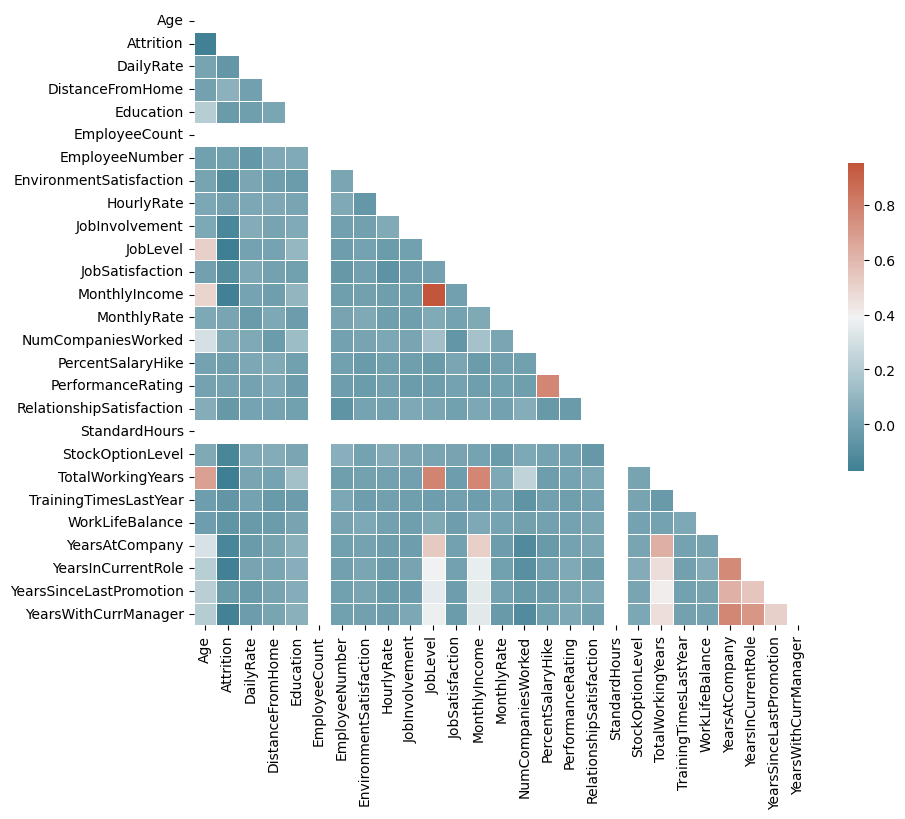

In [214]:
# Create a heatmap of correlation between numeric variables


mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True), square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [302]:
def bar_plot_categorical(df, column, overlay_column):
    
    # Calculate the counts for the main column
    main_counts = df[column].value_counts().sort_index()

    # Calculate the counts for the overlay column grouped by the main column
    overlay_counts = df.groupby([column, overlay_column]).size().unstack(fill_value=0)

    # Plot the bars
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define color palette
    base_color = sns.color_palette("tab10", n_colors=len(overlay_counts.columns))
    
    # Plot the bars for the overlay counts
    bottom = pd.Series([0] * len(main_counts), index=main_counts.index)
    for idx, overlay_value in enumerate(overlay_counts.columns):
        ax.bar(main_counts.index, overlay_counts[overlay_value], bottom=bottom, 
               color=base_color[idx], label=overlay_value)
        bottom += overlay_counts[overlay_value]

    # Add the Attrition counts as text on top of each bar
    for idx, overlay_value in enumerate(overlay_counts.columns):
        for i, (cat, count) in enumerate(overlay_counts[overlay_value].items()):
            if count > 0:
                ax.text(i, bottom[cat] - count / 2, str(count), ha='center', va='center', color='white')

    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_title(f'Distribution of IBM Employee {column} Counts and Effect on {overlay_column}')
    ax.legend(title=overlay_column)
    plt.xticks(rotation=90)
    plt.show()

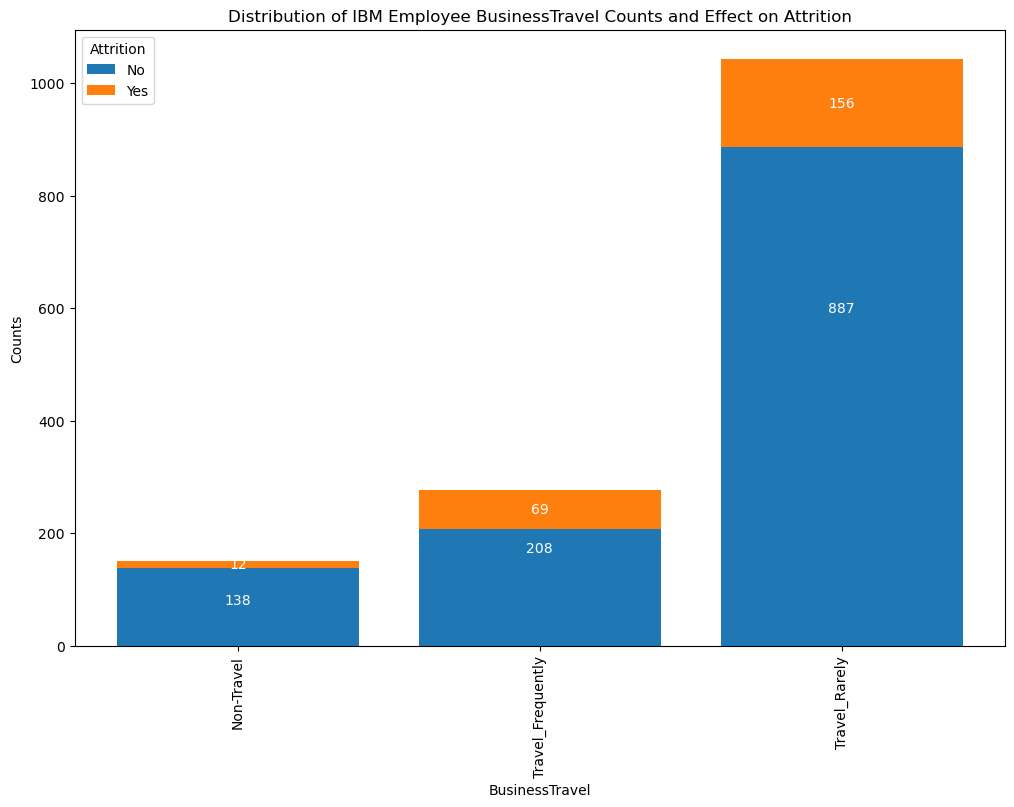

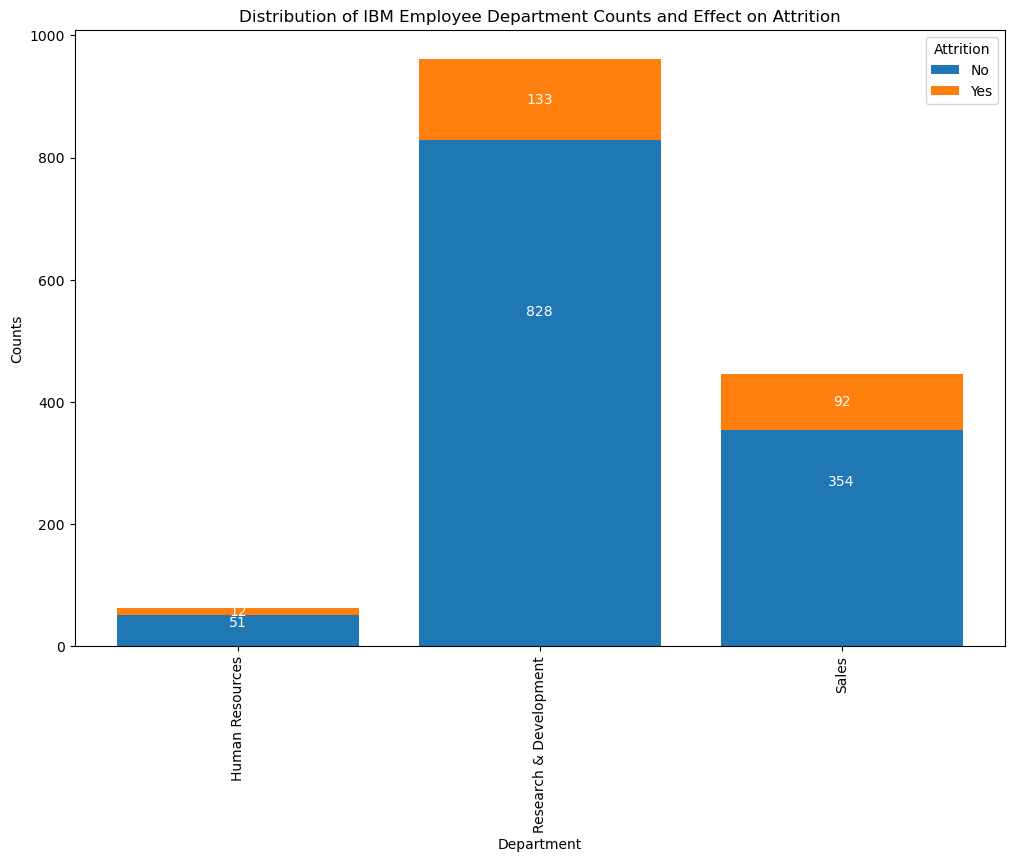

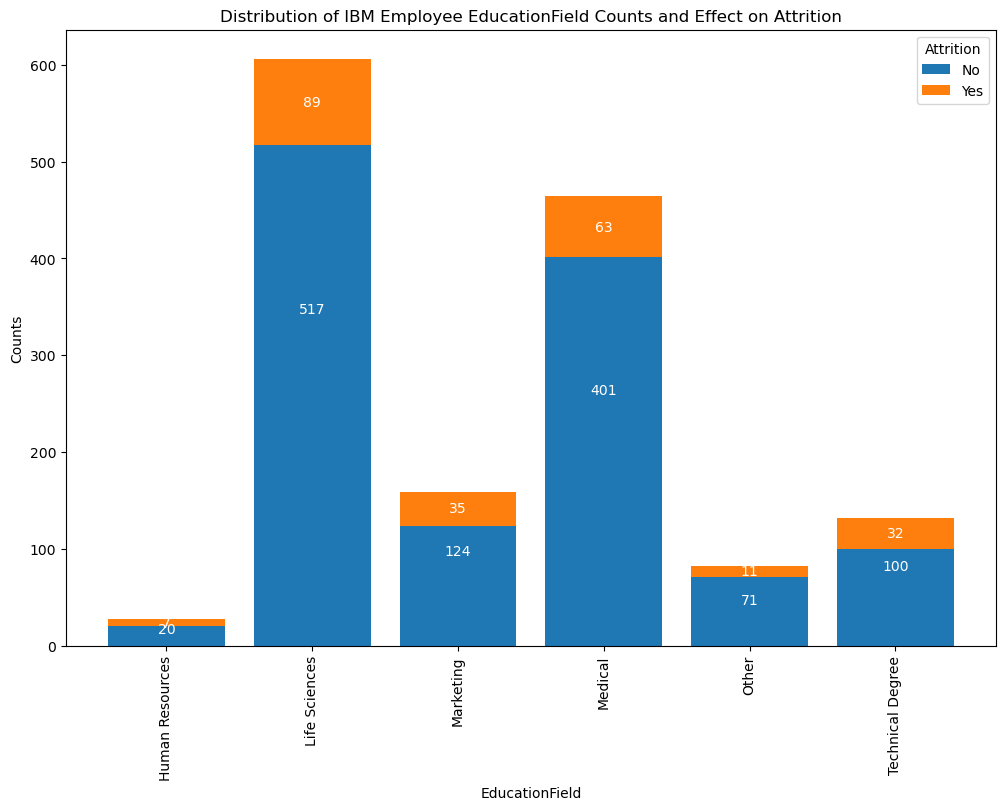

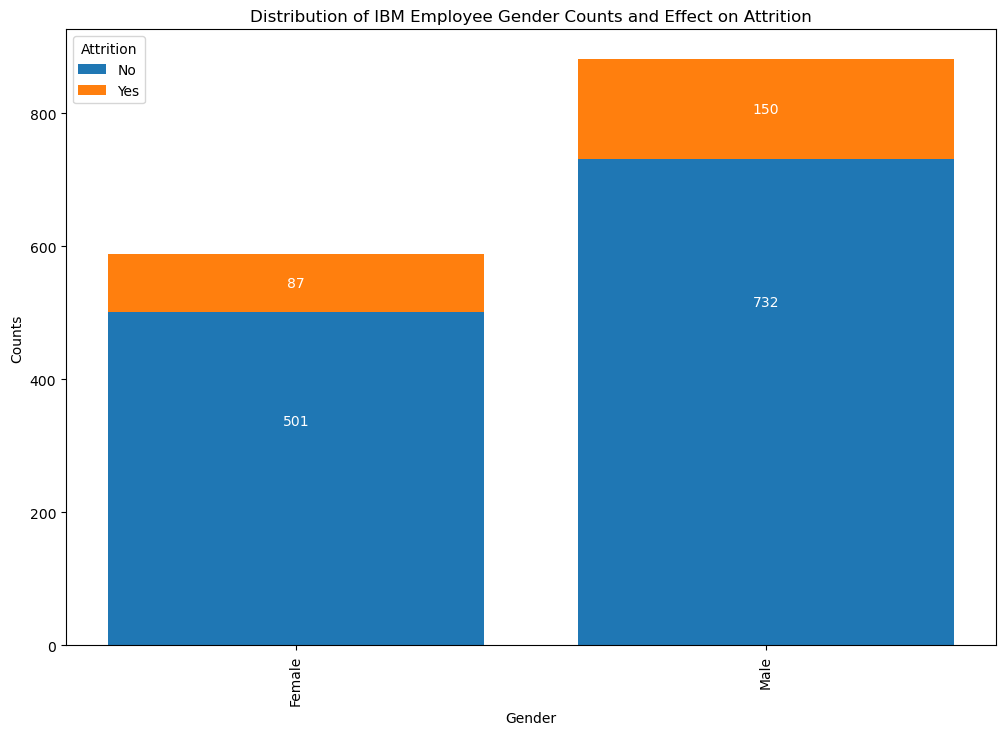

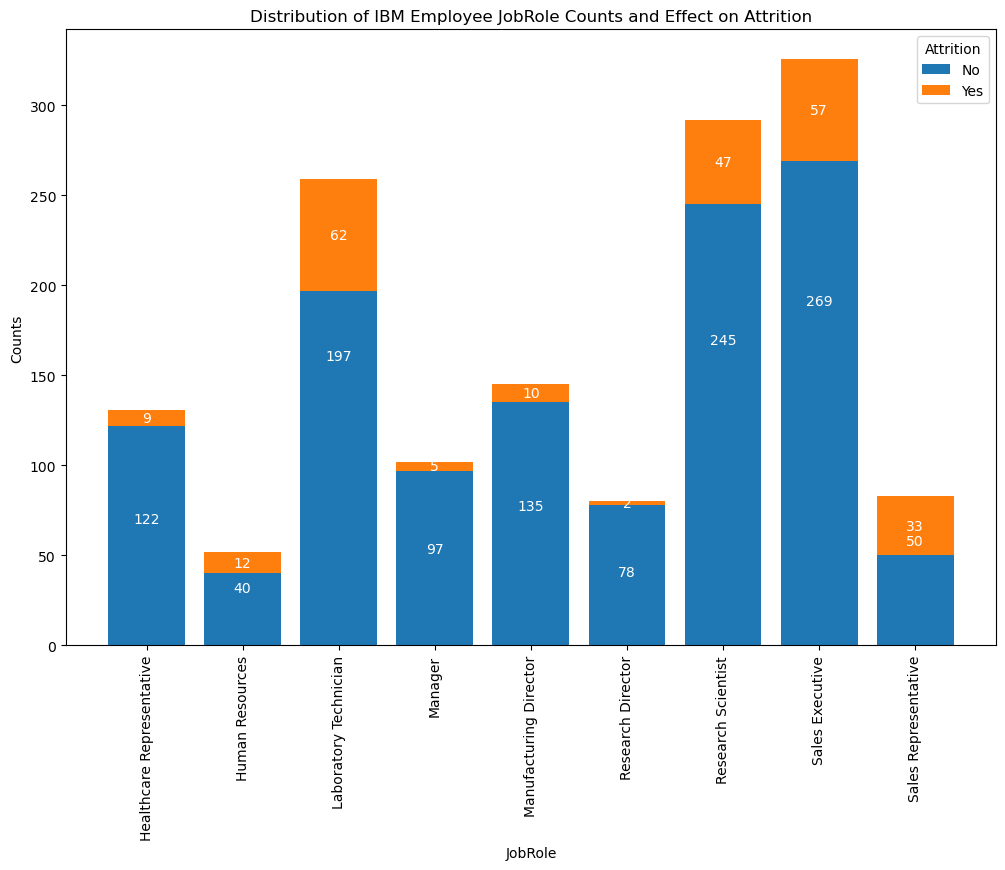

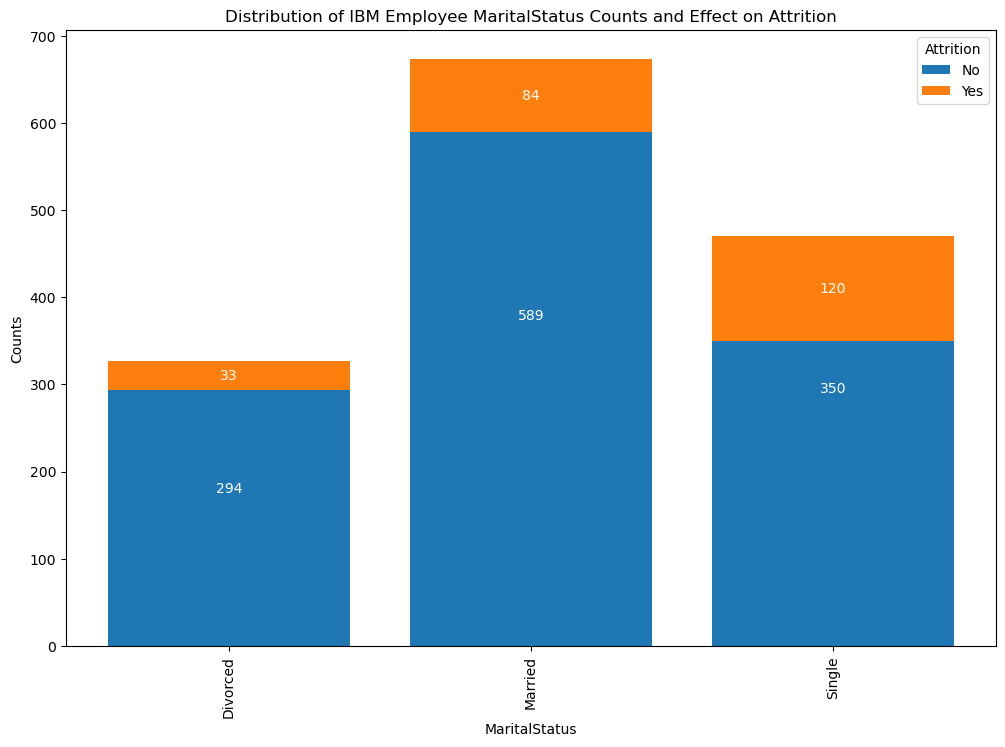

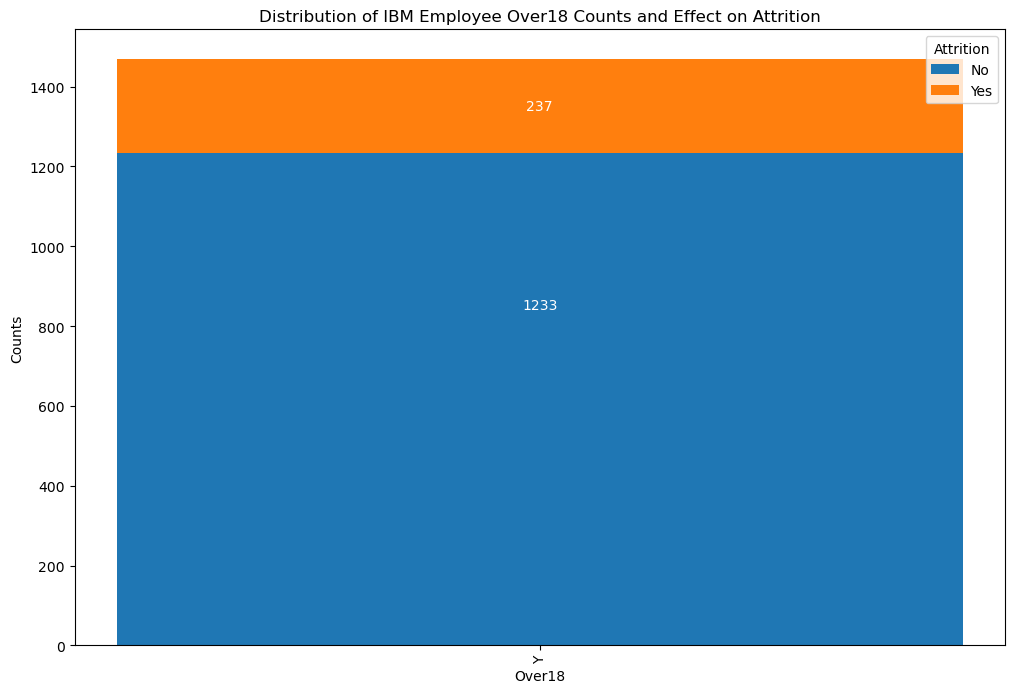

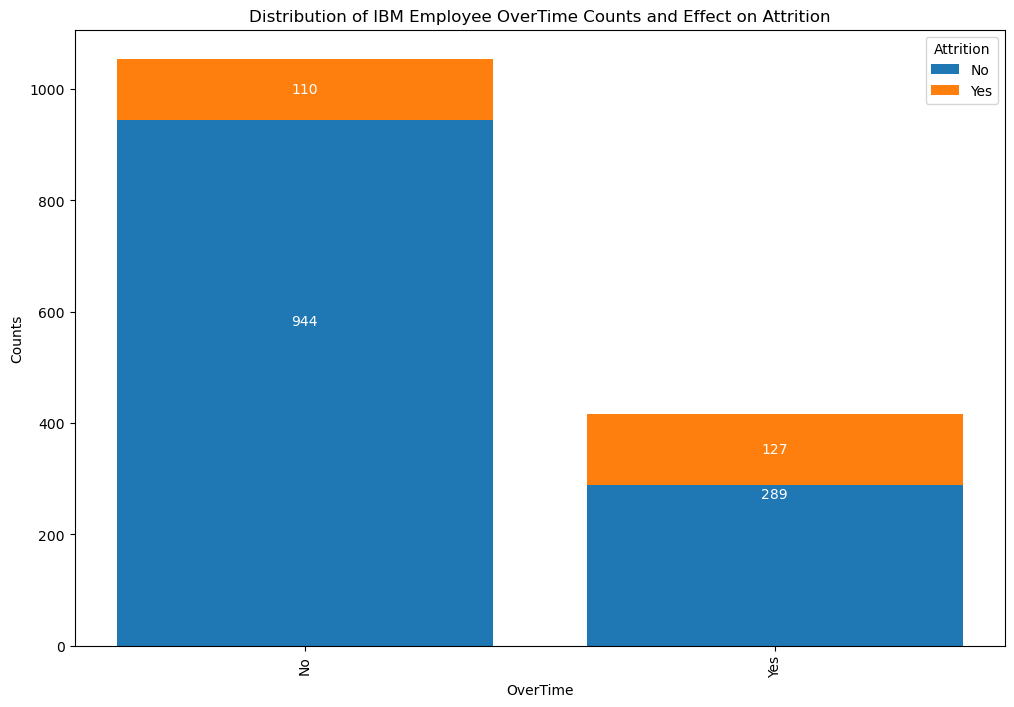

In [303]:
for column in categ_att:
    bar_plot_categorical(df, column, 'Attrition')

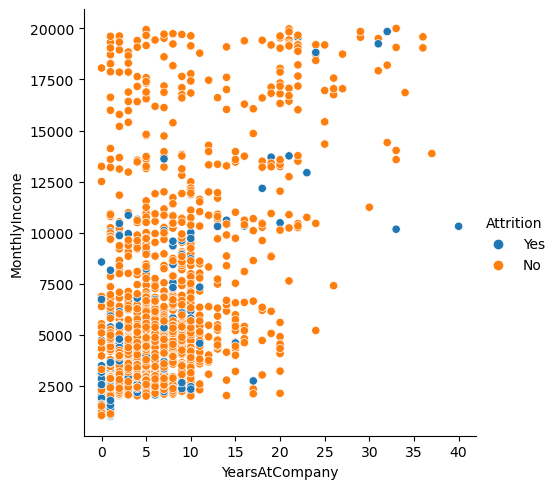

In [287]:
sns.relplot(x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', data=df)

## Effect of Age on Attrition Rate

<Axes: xlabel='Age', ylabel='Attrition'>

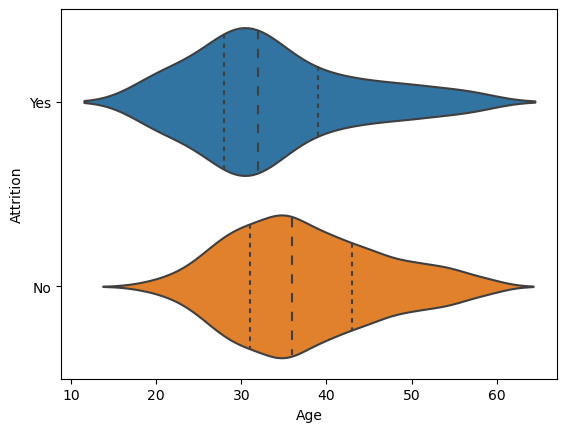

In [288]:
sns.violinplot(data=df, x='Age', y='Attrition',  inner="quart")

In [225]:
pos_attrition['Age'].mean()

33.607594936708864

In [226]:
neg_attrition['Age'].mean()

37.561232765612324

In [235]:
Q1 = pos_attrition['Age'].quantile(0.25)
Q3 = pos_attrition['Age'].quantile(0.75)
print(f'50% of the individuals who left the company fell between {Q1} and {Q3}')

50% of the individuals who left the company fell between 28.0 and 39.0


In [236]:
Q1 = neg_attrition['Age'].quantile(0.25)
Q3 = neg_attrition['Age'].quantile(0.75)
print(f'50% of the individuals who stayed at the company fell between {Q1} and {Q3}')

50% of the individuals who stayed at the company fell between 31.0 and 43.0


Conclusions: Older individuals are more likely to remain at the company than younger individuals.

## Effect of Department on Attrition

In [289]:
# Calculate percentage of attrition by department
department_percentages = df.groupby('Department')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

<Axes: xlabel='Department', ylabel='Percentage'>

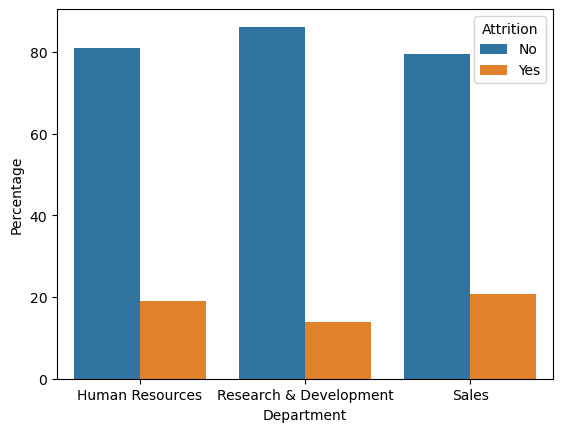

In [290]:
sns.barplot(x='Department', y='Percentage', hue='Attrition', data=department_percentages, palette='tab10')

In [291]:
print(department_percentages)

               Department Attrition  Percentage
0         Human Resources        No   80.952381
1         Human Resources       Yes   19.047619
2  Research & Development        No   86.160250
3  Research & Development       Yes   13.839750
4                   Sales        No   79.372197
5                   Sales       Yes   20.627803


Conclusions: Sales and HR account have a much higher rate of attrition than research and development.

## Effect of Gender on Attrition

In [292]:
gender_percentages = df.groupby('Gender')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

<Axes: xlabel='Gender', ylabel='Percentage'>

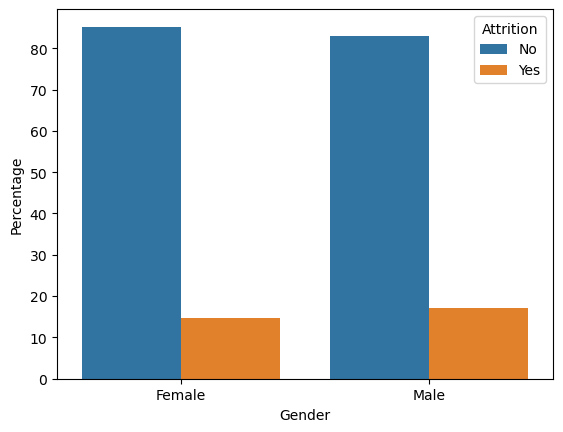

In [293]:
sns.barplot(x='Gender', y='Percentage', hue='Attrition', data=gender_percentages, palette='tab10')

In [294]:
print(gender_percentages)

   Gender Attrition  Percentage
0  Female        No   85.204082
1  Female       Yes   14.795918
2    Male        No   82.993197
3    Male       Yes   17.006803


Conclusions: Males are slightly more likely to leave the company than females by around 2.2%. 

## Effect of Job Role on Attrition

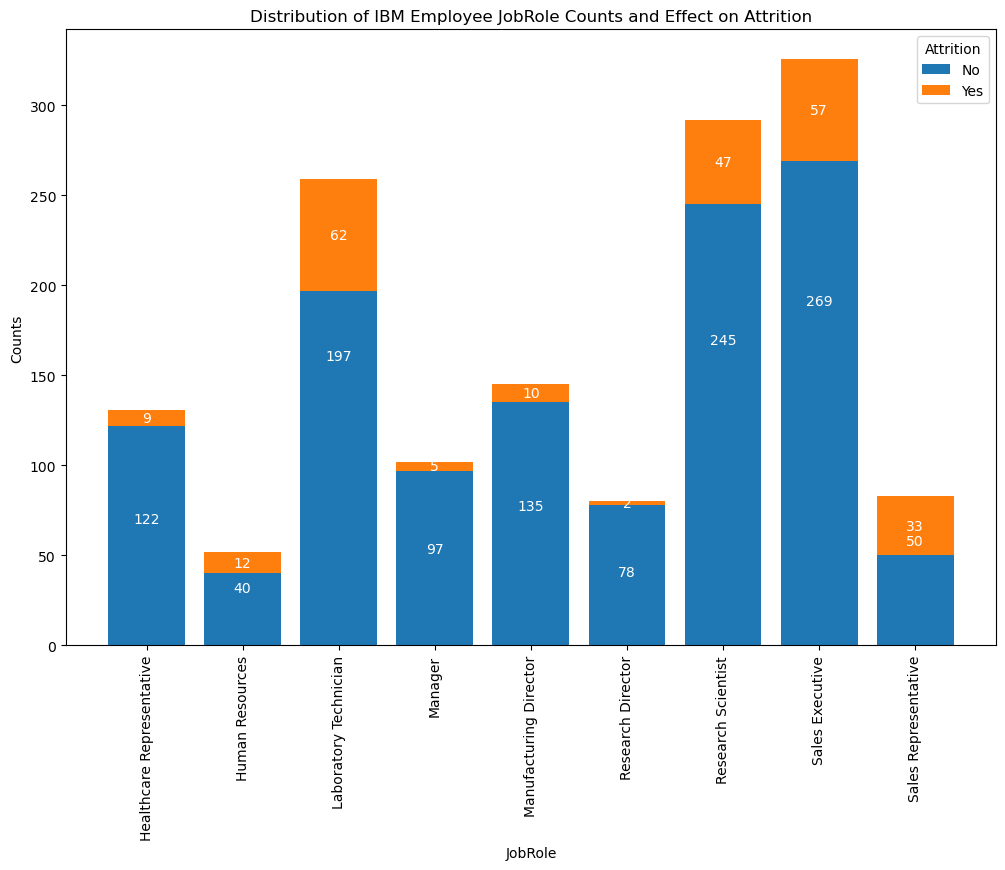

In [319]:
bar_plot_categorical(df, 'JobRole', 'Attrition')

In [305]:
# Calculate JobRole Percentages
jobrole_percentages = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

In [306]:
print(jobrole_percentages)

                      JobRole Attrition  Percentage
0   Healthcare Representative        No   93.129771
1   Healthcare Representative       Yes    6.870229
2             Human Resources        No   76.923077
3             Human Resources       Yes   23.076923
4       Laboratory Technician        No   76.061776
5       Laboratory Technician       Yes   23.938224
6                     Manager        No   95.098039
7                     Manager       Yes    4.901961
8      Manufacturing Director        No   93.103448
9      Manufacturing Director       Yes    6.896552
10          Research Director        No   97.500000
11          Research Director       Yes    2.500000
12         Research Scientist        No   83.904110
13         Research Scientist       Yes   16.095890
14            Sales Executive        No   82.515337
15            Sales Executive       Yes   17.484663
16       Sales Representative        No   60.240964
17       Sales Representative       Yes   39.759036


Conclusions: The highest rates of attrition are among sales representatives at 39.8%, lab technicians at 23.9%, and HR at 23.1%. The lowest rates of attrition are among research directors at 2.5%, managers at 4.9%, and helathcare representatives at 6.9%.

## Effect of Monthly Income on Attrition

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

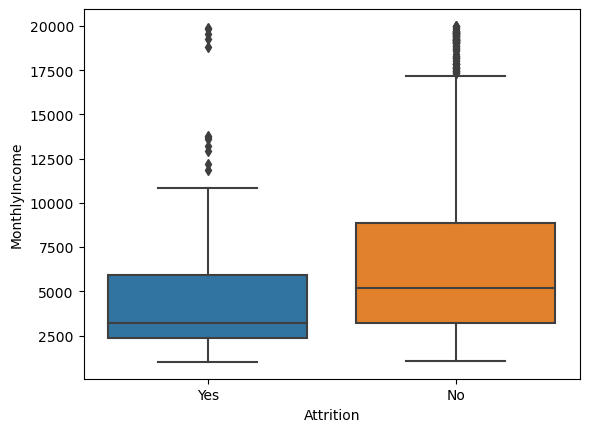

In [307]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

In [315]:
Q1 = pos_attrition['MonthlyIncome'].quantile(0.25)
Q3 = pos_attrition['MonthlyIncome'].quantile(0.75)
median= pos_attrition['MonthlyIncome'].median()
print(f'50% of the individuals who left the company had a monthly salary between {Q1} and {Q3} US dollars with a median monthly salary of {median} US dollars')

50% of the individuals who left the company had a monthly salary between 2373.0 and 5916.0 US dollars with a median monthly salary of 3202.0 US dollars


In [316]:
Q1 = neg_attrition['MonthlyIncome'].quantile(0.25)
Q3 = neg_attrition['MonthlyIncome'].quantile(0.75)
median= neg_attrition['MonthlyIncome'].median()
print(f'50% of the individuals who stayed with the company had a monthly salary between {Q1} and {Q3} US dollars with a median monthly salary of {median} US dollars')

50% of the individuals who stayed with the company had a monthly salary between 3211.0 and 8834.0 US dollars with a median monthly salary of 5204.0 US dollars


Conclusions: Individuals who are paid more are less likely to leave the company.

## Effect of Job Level on Attrition

<Axes: xlabel='JobLevel', ylabel='count'>

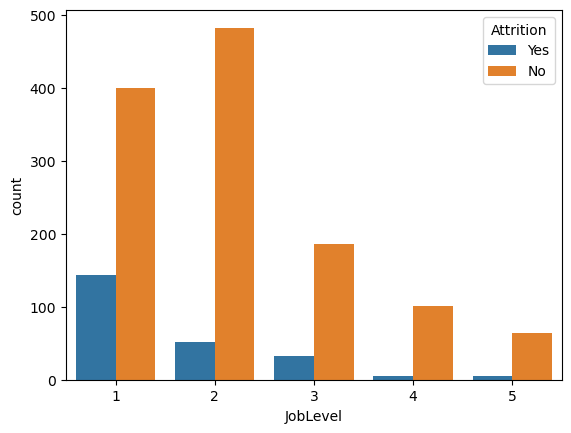

In [321]:
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='tab10')

In [326]:
joblevel_percentages = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

In [327]:
print(joblevel_percentages)

   JobLevel Attrition  Percentage
0         1        No   73.664825
1         1       Yes   26.335175
2         2        No   90.262172
3         2       Yes    9.737828
4         3        No   85.321101
5         3       Yes   14.678899
6         4        No   95.283019
7         4       Yes    4.716981
8         5        No   92.753623
9         5       Yes    7.246377


Conclusions: Individuals at lower job levels are more likely to leave the company. Entry level individuals have a 26% attrition rate which is higher than the next two job levels combined (level 2 at 9.7% and level 3 at 14.7%).